In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gzbuilderspirals import theta_from_pa, pa_from_r_theta
from gzbuilderspirals import fit_varying_pa, xy_from_r_theta
from scipy import interpolate, integrate

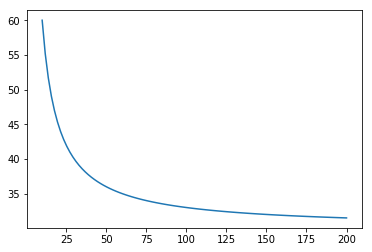

In [15]:
N = 100
r = np.linspace(10, 200, N)
pa = 300/r +30
plt.plot(r, pa);

In [16]:
t, t_err = theta_from_pa(r, pa, C=-0.1, return_err=True, 
                         epsabs=1E-5)

/Users/tlingard/PhD/gzbuilderspirals/gzbuilderspirals/__init__.py:147: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  step = integrate.quad(f, r[0], r[i], **kwargs)
/Users/tlingard/PhD/gzbuilderspirals/gzbuilderspirals/__init__.py:147: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  step = integrate.quad(f, r[0], r[i], **kwargs)


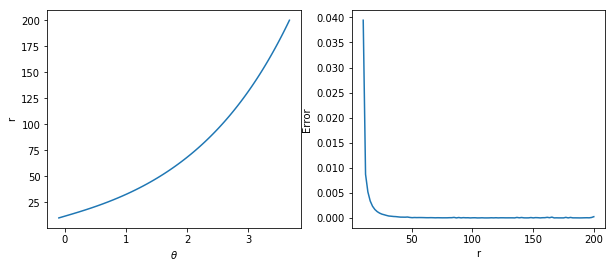

In [17]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t, r)
plt.xlabel(r'$\theta$')
plt.ylabel('r')
plt.subplot(122)
plt.plot(r, np.abs(pa - pa_from_r_theta(t, r))/pa)
plt.xlabel('r')
plt.ylabel(r'Error');

In [18]:
pas = [35, 45]
pa_const = np.tile(pas[0], len(r))
t_const = theta_from_pa(r, pa_const)

pa_const2 = np.tile(pas[1], len(r))
t_const2 = theta_from_pa(r, pa_const2)

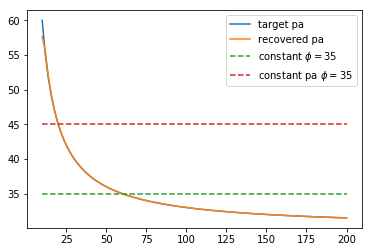

In [19]:
plt.plot(r, pa, label='target pa')
plt.plot(r, pa_from_r_theta(t, r),
         label='recovered pa')
plt.plot(r, pa_from_r_theta(t_const, r), '--',
         label=r'constant $\phi = {}$'.format(pas[0]))
plt.plot(r, pa_from_r_theta(t_const2, r), '--',
         label=r'constant pa $\phi = {}$'.format(pas[0]))
plt.legend();

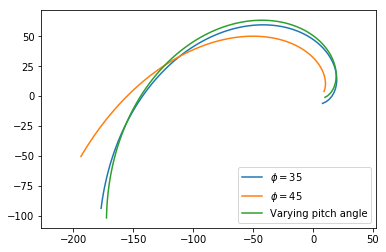

In [27]:
plt.plot(*xy_from_r_theta(r, t_const - 0.65), label=r'$\phi = {}$'.format(pas[0]))
plt.plot(*xy_from_r_theta(r, t_const2 + 0.4), label=r'$\phi = {}$'.format(pas[1]))
plt.plot(*xy_from_r_theta(r, t), label='Varying pitch angle')
plt.axis('equal');
plt.legend();

## What about real data?

Let's load in an example arm and see if a varying pitch angle looks like a better fit

In [10]:
from gzbuilderspirals.oo import Arm
import os
a_ = Arm.load('lib/spiral_arms/20902040-0.pickle')
a = Arm(a_.get_parent(), a_.arms)
print('Pitch angle {:.4f} ± {:.4f}'.format(a.pa, a.sigma_pa))

Pitch angle 15.9578 ± 2.4885


We'll choose to change this pitch angle to be a linear function with radius

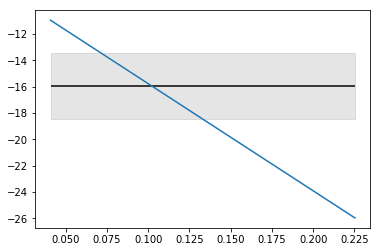

In [11]:
s = -1 if a.chirality else 1
r = np.linspace(a.R.min(), a.R.max(), 100)
pa = np.tile(s * a.pa, len(r)) + np.linspace(5, -10, len(r))
plt.hlines(s*a.pa, r.min(), r.max())
plt.fill_between(r, s*a.pa - a.sigma_pa, s*a.pa + a.sigma_pa,
                 alpha=0.1, color='k')
plt.plot(r, pa)

And now examine the results!

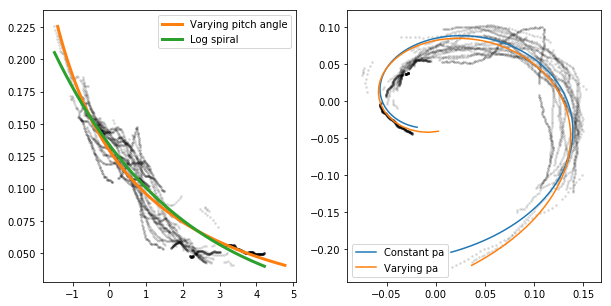

In [12]:
t = fit_varying_pa(a, r, pa)
order = np.argsort(t)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(a.t, a.R, s=3, c='k', alpha=0.1)
plt.plot(t, r, c='C1', linewidth=3, label='Varying pitch angle')
plt.plot(*a.polar_logsp, c='C2', linewidth=3, label='Log spiral')
plt.legend();
plt.subplot(122)
plt.scatter(*xy_from_r_theta(a.R, a.t), s=3, c='k', alpha=0.1)
plt.plot(*xy_from_r_theta(*a.polar_logsp[::-1]), label='Constant pa')
plt.plot(*xy_from_r_theta(r, t), label='Varying pa')
plt.legend();

There's not much of a difference, but the varying pitch angle could be seen as a better fit.